In [40]:
from fbprophet import Prophet
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime  as dt

In [2]:
import nltk
from wordcloud import WordCloud, STOPWORDS

In [3]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

In [52]:
df = pd.read_csv('../data/emp.csv', encoding='utf-8', thousands=',')

In [53]:
df

,기간,구분,소계,남자,여자,초등학교졸업이하,중졸,고졸,대졸이상
0,2001Q1,서울시,4614,2688,1926,403,587,2052,1573
1,2001Q2,서울시,4759,2790,1969,435,604,2117,1604
2,2001Q3,서울시,4766,2796,1970,427,605,2137,1596
3,2001Q4,서울시,4805,2800,2005,434,616,2159,1597
4,2002Q1,서울시,4761,2784,1977,411,595,2162,1593
...,...,...,...,...,...,...,...,...,...
71,2018Q4,서울시,5060,2764,2296,205,301,1675,2879
72,2019Q1,서울시,4972,2738,2235,185,299,1615,2874
73,2019Q2,서울시,5098,2783,2315,221,305,1618,2955
74,2019Q3,서울시,5145,2807,2338,222,317,1588,3019


In [54]:
df['기간'] = pd.to_datetime(df['기간'])

## 취업 총계

In [61]:
df2 = pd.DataFrame({
    'ds' : df['기간'],
    'y' : df['소계']
})

In [66]:
m = Prophet(daily_seasonality=True)
m.fit(df2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [108]:
future =m.make_future_dataframe(periods=8, freq='Q')

In [109]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2001-01-01,4653.946998,4610.338665,4696.270158
1,2001-04-01,4752.948561,4709.636890,4794.493797
2,2001-07-01,4746.460297,4703.592402,4791.211287
3,2001-10-01,4775.039244,4731.969255,4817.060322
4,2002-01-01,4725.156941,4681.913797,4765.038466
...,...,...,...,...
79,2020-09-30,5065.719448,5020.707411,5106.817940
80,2020-12-31,5008.624311,4964.964710,5051.633967
81,2021-03-31,5123.257595,5077.327957,5169.579113
82,2021-06-30,5168.864760,5120.278869,5213.677113


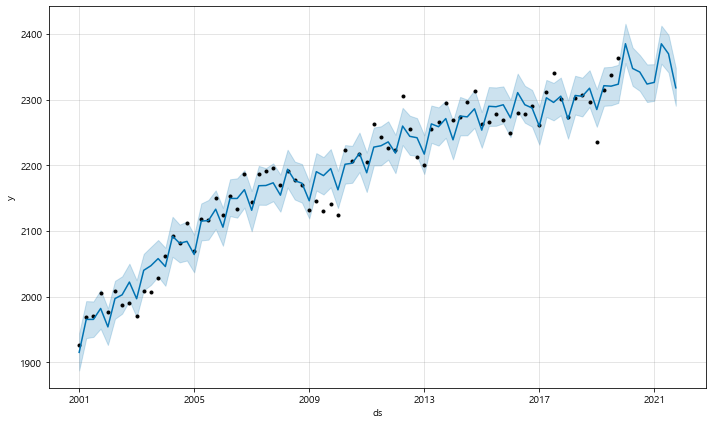

In [122]:
m.plot(forecast);

# 1. 남

In [117]:
df3 = pd.DataFrame({
    'ds' : df['기간'],
    'y' : df['남자']
})

In [118]:
df3

,ds,y
0,2001-01-01,2688
1,2001-04-01,2790
2,2001-07-01,2796
3,2001-10-01,2800
4,2002-01-01,2784
...,...,...
71,2018-10-01,2764
72,2019-01-01,2738
73,2019-04-01,2783
74,2019-07-01,2807


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


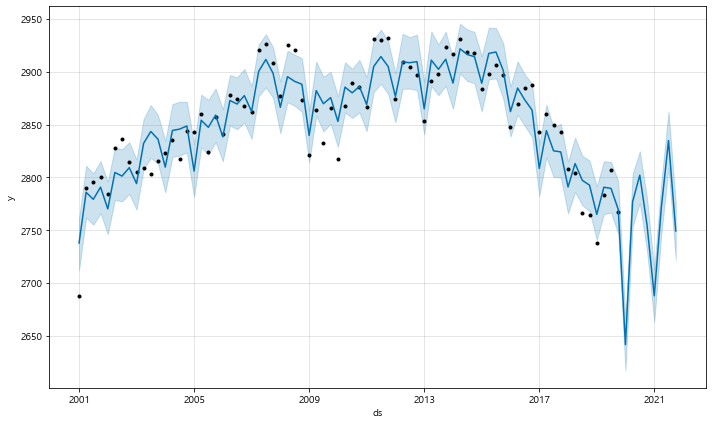

In [119]:
m = Prophet(daily_seasonality=True)
m.fit(df3)
future =m.make_future_dataframe(periods=8, freq='Q')
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]
m.plot(forecast);

# 2. 여

In [120]:
df4 = pd.DataFrame({
    'ds' : df['기간'],
    'y' : df['여자']
})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


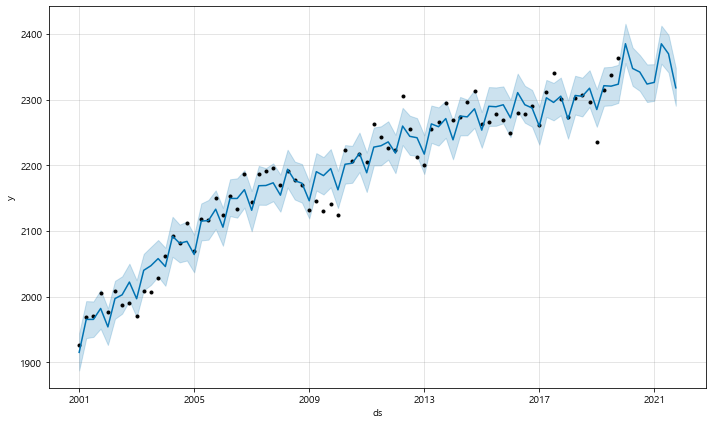

In [121]:
m = Prophet(daily_seasonality=True)
m.fit(df4)
future =m.make_future_dataframe(periods=8, freq='Q')
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']]
m.plot(forecast);

# 5. 결론
## 1. 남자의 취업자 수는 점차 감소 추세로 보여진다.
## 2. 여자의 취업자 수는 점차 증가 추세로 보여진다.
## 3. 총 취업자 수는 점차 증가할 것으로 예상된다.
## 4. 초,중,고 졸업 취업자 수는 점차 감소하였다.
## 5. 대학 졸업 취업자 수는 점차 증가하였다.